<a href="https://colab.research.google.com/github/havaledar/House-prices-kaggle-6100/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install association_metrics

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # R-style formula api
import association_metrics as am

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3954 sha256=febfb139df249add9855dcf89375c19b3c203c5b17660aeb93f4af54845e6760
  Stored in directory: /root/.cache/pip/wheels/2d/1e/07/287b993a07cc41eade32a9b863d6d4686f985d72344a9e0911
Successfully built association-metrics


In [2]:
df_train=pd.read_csv("https://raw.githubusercontent.com/havaledar/House-prices-kaggle-6100/main/train.csv")
df_test=pd.read_csv("https://raw.githubusercontent.com/havaledar/House-prices-kaggle-6100/main/test.csv")

In [3]:
#Understand the type and number of NAs in the variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Remove the variables with more than 100 NA
na_number=df_train[df_train.columns[df_train.isnull().any()]].isnull().sum()

df_train_100=df_train.drop(na_number[na_number > 100].index ,axis=1)

In [5]:
# Convert you str columns to Category columns
df_train_100_c = df_train_100.apply(lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using pandas.DataFrame
cramersv = am.CramersV(df_train_100_c) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are the categorical variables of the passed pandas.DataFrame
var_cat=cramersv.fit()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/pivot.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agged[v] = maybe_downcast_to_dtype(agged[v], data[v].dtype)


In [12]:
#Selecting lower triangle without diagonal and removing variables with more than 50% correlation
var_cat_l=var_cat.where(np.tril(np.ones(var_cat.shape),-1).astype(np.bool))
df_train_100_c_l=df_train_100_c[var_cat_l.columns[var_cat_l.max()<0.5]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [13]:
df_train_100_c_l

,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,...,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType
0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,...,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD
1,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,...,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,Y,WD
2,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,...,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD
3,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,...,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,Y,WD
4,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,...,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,...,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,Y,WD
1456,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,...,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,Y,WD
1457,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,...,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD
1458,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,...,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,Y,WD


In [8]:
df_train_100_c_l.info() #NA should be filled with median or another thing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Street        1460 non-null   category
 1   LotShape      1460 non-null   category
 2   LandContour   1460 non-null   category
 3   Utilities     1460 non-null   category
 4   LotConfig     1460 non-null   category
 5   LandSlope     1460 non-null   category
 6   Condition1    1460 non-null   category
 7   Condition2    1460 non-null   category
 8   BldgType      1460 non-null   category
 9   HouseStyle    1460 non-null   category
 10  RoofStyle     1460 non-null   category
 11  RoofMatl      1460 non-null   category
 12  Exterior2nd   1460 non-null   category
 13  MasVnrType    1452 non-null   category
 14  ExterCond     1460 non-null   category
 15  Foundation    1460 non-null   category
 16  BsmtQual      1423 non-null   category
 17  BsmtCond      1423 non-null   category
 18  BsmtExpo

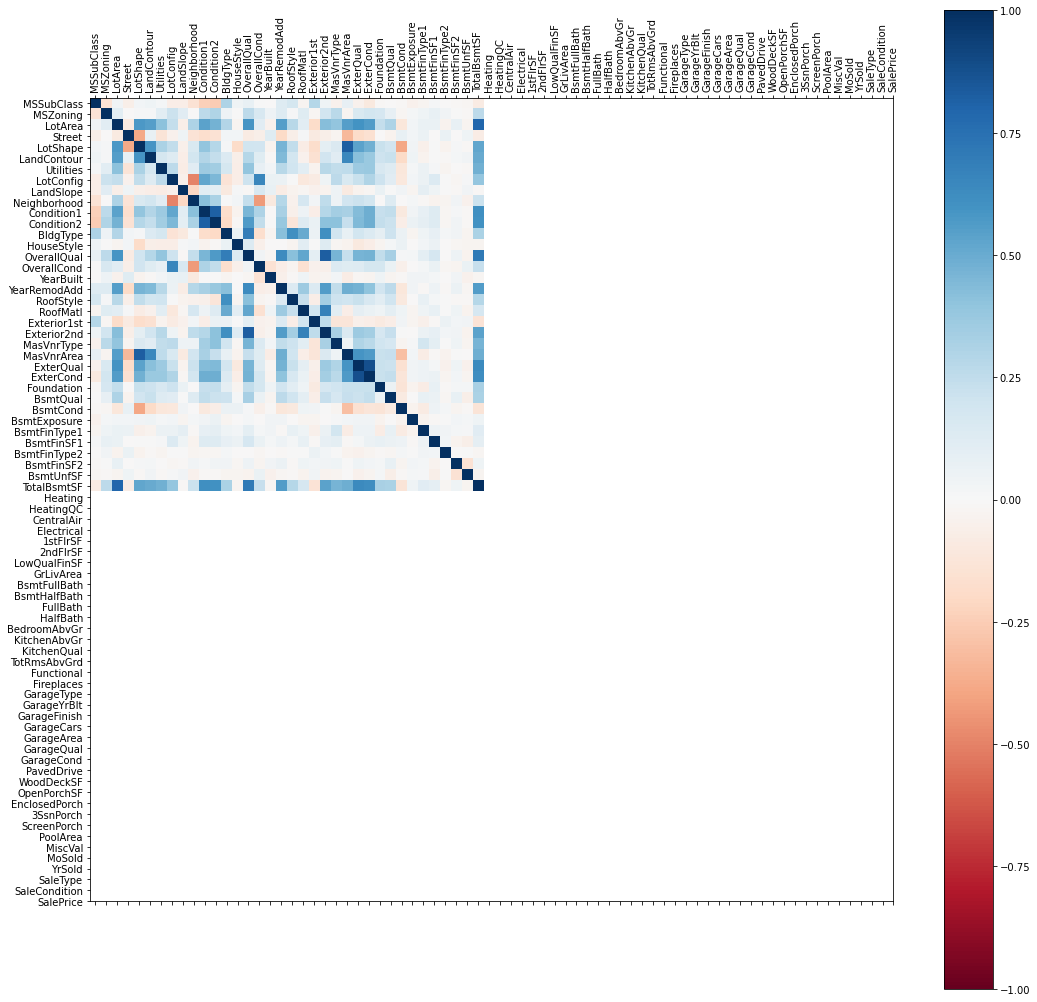

In [ ]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='RdBu', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
fig.set_size_inches(18, 18)
plt.show()

In [ ]:
#https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

df_train_nona.corr().abs()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,0.033226,0.028365,0.012609,0.012713,0.021998,0.050298,0.005024,0.005968,...,0.029643,0.000477,0.002889,0.046635,0.001330,0.057044,0.006242,0.021172,0.000712,0.021917
MSSubClass,0.011156,1.000000,0.139781,0.032628,0.059316,0.027850,0.040581,0.022936,0.069836,0.065649,...,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.084284
LotArea,0.033226,0.139781,1.000000,0.105806,0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843
OverallQual,0.028365,0.032628,0.105806,1.000000,0.091932,0.572323,0.550684,0.411876,0.239666,0.059119,...,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347,0.790982
OverallCond,0.012609,0.059316,0.005636,0.091932,1.000000,0.375983,0.073741,0.128101,0.046231,0.040229,...,0.003334,0.032589,0.070356,0.025504,0.054811,0.001985,0.068777,0.003511,0.043950,0.077856
YearBuilt,0.012713,0.027850,0.014228,0.572323,0.375983,1.000000,0.592855,0.315707,0.249503,0.049107,...,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618,0.522897
YearRemodAdd,0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,0.067759,...,0.205726,0.226298,0.193919,0.045286,0.038740,0.005829,0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.050298,0.022936,0.104160,0.411876,0.128101,0.315707,0.179618,1.000000,0.264736,0.072319,...,0.159718,0.125703,0.110204,0.018796,0.061466,0.011723,0.029815,0.005965,0.008201,0.477493
BsmtFinSF1,0.005024,0.069836,0.214103,0.239666,0.046231,0.249503,0.128451,0.264736,1.000000,0.050117,...,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491,0.003571,0.015727,0.014359,0.386420
BsmtFinSF2,0.005968,0.065649,0.111170,0.059119,0.040229,0.049107,0.067759,0.072319,0.050117,1.000000,...,0.067898,0.003093,0.036543,0.029993,0.088871,0.041709,0.004940,0.015211,0.031706,0.011378


In [ ]:
SalePrice_and_LotFrontage_model = smf.ols(formula='SalePrice ~ LotFrontage', data=df)
SalePrice_and_LotFrontage_fit = SalePrice_and_LotFrontage_model.fit()
print(SalePrice_and_LotFrontage_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     169.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.60e-36
Time:                        16:48:24   Log-Likelihood:                -15233.
No. Observations:                1201   AIC:                         3.047e+04
Df Residuals:                    1199   BIC:                         3.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.615e+04   6881.966     13.971      

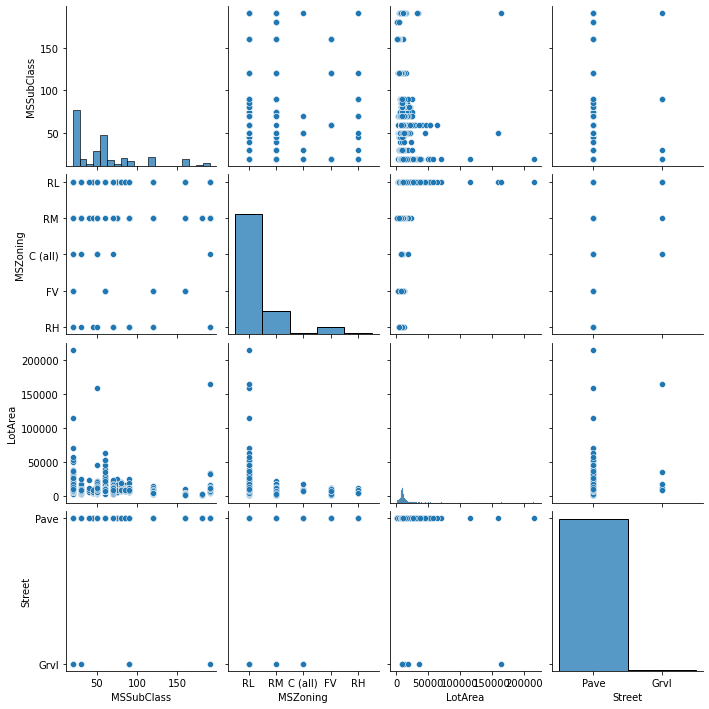

In [ ]:
sns.pairplot(df_train_nona, vars=df_train_nona.columns[1:5]);

# Executive Summary
